# Cell body interactions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms

from neurorosettes import physics
from neurorosettes.subcellular import ObjectFactory

## Creating objects and interactions

In [2]:
# Define the mechanical parameters of the objects
factory = ObjectFactory(
    cell_radius=8.0,
    cell_interaction_factor=1.25,
    neurite_radius=0.5,
    neurite_interaction_factor=1.25,
    neurite_spring_constant=10.0,
    neurite_default_length=10.0,
)

# Define the mechanical parameters of the interactions
contact_function = physics.PotentialsContact(
    adhesion_coefficient=0.4, repulsion_coefficient=40.0, smoothness_factor=1
)

# Create the cell bodies
sphere1 = factory.get_cell_body(center_position=np.array([-6.5, -4.5, 0.0]))
sphere2 = factory.get_cell_body(center_position=np.array([6.5, 8.5, 0.0]))
# Get the force of an object on the other object
force = sphere1.get_neighbor_force(neighbor=sphere2, interaction=contact_function)

## Compute interaction forces

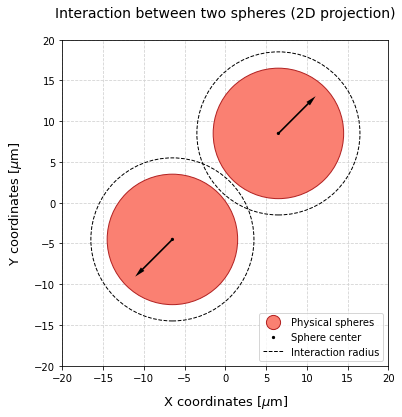

In [68]:
fig, ax = plt.subplots(figsize=(6, 6))

# Draw the cell bodies
ax.add_patch(
    patches.Circle(
        (sphere1.position[0], sphere1.position[1]),
        radius=sphere1.mechanics.radius,
        edgecolor="firebrick",
        facecolor="salmon",
    )
)

ax.add_patch(
    patches.Circle(
        (sphere2.position[0], sphere2.position[1]),
        radius=sphere1.mechanics.radius,
        edgecolor="firebrick",
        facecolor="salmon",
    )
)

# Draw the interaction radii
ax.add_patch(
    patches.Circle(
        (sphere1.position[0], sphere1.position[1]),
        radius=0.2,
        fill=True,
        alpha=1,
        facecolor="black",
    )
)

ax.add_patch(
    patches.Circle(
        (sphere2.position[0], sphere2.position[1]),
        radius=0.2,
        fill=True,
        alpha=1,
        facecolor="black",
    )
)

# Draw the cell centres
ax.add_patch(
    patches.Circle(
        (sphere1.position[0], sphere1.position[1]),
        radius=sphere1.mechanics.interaction_radius,
        fill=None,
        alpha=1,
        edgecolor="black",
        linestyle="--",
    )
)

ax.add_patch(
    patches.Circle(
        (sphere2.position[0], sphere2.position[1]),
        radius=sphere2.mechanics.interaction_radius,
        fill=None,
        alpha=1,
        edgecolor="black",
        linestyle="--",
    )
)

# Draw the forces
ax.add_patch(
    patches.Arrow(
        x=sphere1.position[0],
        y=sphere1.position[1],
        dx=force[0] * 25,
        dy=force[1] * 25,
        alpha=1,
        facecolor="black",
    )
)

ax.add_patch(
    patches.Arrow(
        x=sphere2.position[0],
        y=sphere2.position[1],
        dx=-force[0] * 25,
        dy=-force[1] * 25,
        alpha=1,
        facecolor="black",
    )
)

# Create data for the legend
ax.scatter(
    [],
    [],
    edgecolor="firebrick",
    facecolor="salmon",
    marker="o",
    s=200,
    label="Physical spheres",
)
ax.scatter([], [], color="black", marker="o", s=5, label="Sphere center")
ax.plot([], [], color="black", linestyle="--", linewidth=1, label="Interaction radius")
ax.legend(loc="lower right")

ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_axisbelow(True)
ax.grid("both", color="lightgrey", linestyle="--")
ax.set_title("Interaction between two spheres (2D projection)", y=1.05, fontsize=14)
ax.set_ylabel("Y coordinates [$\mu$m]", fontsize=13, labelpad=10)
ax.set_xlabel("X coordinates [$\mu$m]", fontsize=13, labelpad=10)
ax.set_aspect("equal", adjustable="box")

plt.savefig("../../docs/img/sphere_sphere.svg")
plt.show()